[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1YC3sONhRCoaBq-wGqdjP7GEpAlXXI1Ng?usp=sharing)

In [ ]:
import torch.nn as nn
import torch
import torchaudio
import seaborn as sns

import pandas as pd
import numpy as np
from IPython import display

In [ ]:
# Path to the training logs on cluster: /home/dadyatlova_1/russian_speech_denoiser/denoiser/outputs/exp_/trainer.log
# Data path: /home/dadyatlova_1/russian_speech_denoiser/DNS-Challenge/datasets/training_set_jan14_min35_10_40h/
# Noisy data creation config path: /home/dadyatlova_1/russian_speech_denoiser/DNS-Challenge/noisyspeech_synthesizer.cfg 

**Model:** pretrained Demucs (48 hidden).

**Training details:** 

*   60 epochs;
*   1 gpu;
* 24 hours;
* 64 bs.




**Dataset:** 40 hours:

  *   28 hours (train);
  *   4 hours (val);
  * 8 hours (test).



**PESQ (val):** 2.9.

**STOI (val):** 0.9.

In [ ]:
# Test audio samples:
samples_directory_exp_jan14 = "/content/drive/MyDrive/HSE/thesis/samples_jan16/"
sample_rate = 16_000

# Before finetuning 
(run denoiser: demucs 48 hidden on the same samples before training)

### SNR -15

Noisy audio:

In [ ]:
noisy_wav_min_15 = torchaudio.load(samples_directory_exp_jan14 + "min_15/noisy_0.wav")[0].squeeze()
display.display(display.Audio(noisy_wav_min_15, rate=sample_rate))

Enhanced audio:

In [ ]:
noisy_wav_min_15_enhc_no_fnt = torchaudio.load(samples_directory_exp_jan14 + "min_15/enhanced_no_finetune.wav")[0].squeeze()
display.display(display.Audio(noisy_wav_min_15_enhc_no_fnt, rate=sample_rate))

### SNR -30

Noisy audio:

In [ ]:
noisy_wav_min_30 = torchaudio.load(samples_directory_exp_jan14 + "min_30/noisy_0.wav")[0].squeeze()
display.display(display.Audio(noisy_wav_min_30, rate=sample_rate))

Enhanced audio: 

In [ ]:
enhanced_wav_min_30_enhc_no_fnt = torchaudio.load(samples_directory_exp_jan14 + "min_30/enhanced_no_finetune.wav")[0].squeeze()
display.display(display.Audio(enhanced_wav_min_30_enhc_no_fnt, rate=sample_rate))

**Conlusion:** as expected bad quality (originally demucs trained on audio with SNR levels [-5, 35])

---



## After finetuning

### Clean audio

Before enhancement:

In [ ]:
clean_wav = torchaudio.load(samples_directory_exp_jan14 + "min_15/clean_fileid_0_noisy.wav")[0].squeeze()
display.display(display.Audio(clean_wav, rate=sample_rate))

After enhancement:

In [ ]:
clean_wav_enhanced = torchaudio.load(samples_directory_exp_jan14 + "min_15/clean_fileid_0_enhanced.wav")[0].squeeze()
display.display(display.Audio(clean_wav_enhanced, rate=sample_rate))

### SNR -15

Noisy audio: 

In [ ]:
noisy_wav_min_15 = torchaudio.load(samples_directory_exp_jan14 + "min_15/noisy_0.wav")[0].squeeze()
display.display(display.Audio(noisy_wav_min_15, rate=sample_rate))

Enhanced audio:

In [ ]:
enhanced_wav_min_15 = torchaudio.load(samples_directory_exp_jan14 + "min_15/enhanced_0.wav")[0].squeeze()
display.display(display.Audio(enhanced_wav_min_15, rate=sample_rate))

### SNR -30

Noisy audio:

In [ ]:
noisy_wav_min_30 = torchaudio.load(samples_directory_exp_jan14 + "min_30/noisy_0.wav")[0].squeeze()
display.display(display.Audio(noisy_wav_min_30, rate=sample_rate))

Enhanced audio:

In [ ]:
enhanced_wav_min_30 = torchaudio.load(samples_directory_exp_jan14 + "min_30/enhanced_0.wav")[0].squeeze()
display.display(display.Audio(enhanced_wav_min_30, rate=sample_rate))

**Conlusion:** some artefacts were left but reached PESQ 2.9 like in the paper.

# Training logs analysis

In [ ]:
path = samples_directory_exp_jan14 + "logs/trainer.log"

log_data=open(path,'r')
df = {"type": [], "epoch": [], "loss": []}

for line in log_data:
    columns = line.split(' ')
    if len(columns) == 15:

      df["type"].append(columns[3])
      df["epoch"].append(int(columns[6]))
      df["loss"].append(float(columns[14][:6]))

df = pd.DataFrame(df)

train_df = df[df.type == "Train"]
val_df = df[df.type == "Valid"]

training_loss = list(train_df.groupby("epoch").mean().loss)[:60]
validation_loss = list(val_df.groupby("epoch").mean().loss)[:60]

epoch_n = list(range(60)) + list(range(60))
labels = ["train" for _ in range(60)] + ["validation" for _ in range(60)]
loss = training_loss + validation_loss

assert len(epoch_n) == len(loss) == len(labels), "Data Frame can't be created"

plot_df = pd.DataFrame({"epoch": epoch_n, "label": labels, "loss": loss})

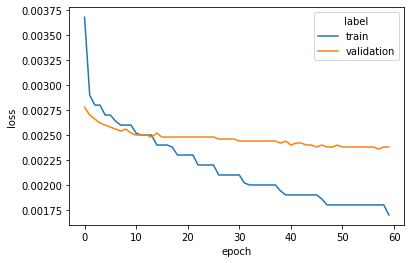

In [ ]:
sns.lineplot(data=plot_df, x="epoch", y="loss", hue="label")